# Ether

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../src/")

import read_files
import partition_energy
import spectral_density
import absorption
import utils

In [31]:
length = 10 #ps
dt = 2 #fs

LHII = read_files.all_LHII_data(f"{length}ps_{dt}fs")

In [32]:
ether_dat = np.concatenate((np.load("../data/ether_chl_xtb/excitation_energies_0_4999.npy"),
                      np.load("../data/ether_chl_xtb/excitation_energies_5000_9999.npy"))
)

In [33]:
b850a = list(range(0, 27, 3))
b800 = list(range(1, 27, 3))
b850b = list(range(2, 27, 3))

In [34]:
ether_dat 

array([0.0667749 , 0.06670124, 0.06707852, ..., 0.06685742, 0.06663987,
       0.06687333])

In [35]:
ring_avg = np.mean(LHII["site_e"][:, b850a], axis=1)

In [36]:
colors = {
    'ether' : 'black',
    'LHII' : 'red',
    'ring' : 'gray'
}

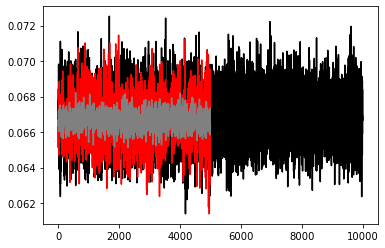

In [37]:
plt.plot(ether_dat, color=colors['ether'])
plt.plot(LHII["site_e"][:,0], color=colors['LHII'])
plt.plot(ring_avg, color=colors['ring'])

In [38]:
autocorr_eth, spectrum_eth, domain_eth = spectral_density.spectrum_and_domain(ether_dat - np.mean(ether_dat), 10)
autocorr_LHII, spectrum_LHII, domain_LHII = spectral_density.spectrum_and_domain(LHII["site_e"][:,0] - np.mean(LHII["site_e"][:,0]), 2)
autocorr_ring, spectrum_ring, domain_ring = spectral_density.spectrum_and_domain(ring_avg - np.mean(ring_avg), 2)

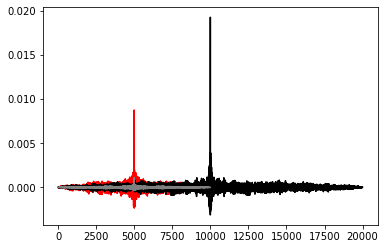

In [39]:
plt.plot(autocorr_LHII[:len(autocorr_LHII)//5], color=colors['LHII'])
plt.plot(autocorr_eth[:len(autocorr_eth)//5], colors['ether'])
plt.plot(autocorr_ring[:len(autocorr_ring)//5], colors['ring'])


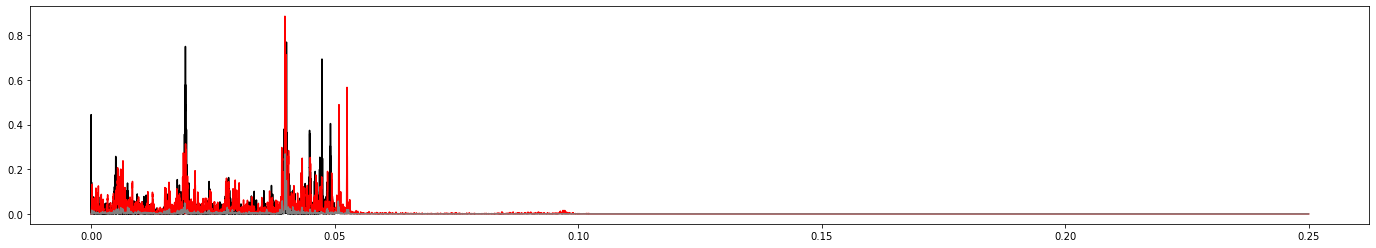

In [40]:
fig, ax = plt.subplots()

ax.plot(utils.first_half(domain_eth), utils.first_half(np.abs(spectrum_eth)), colors['ether'])
ax.plot(utils.first_half(domain_LHII), utils.first_half(np.abs(spectrum_LHII)), color=colors['LHII'])
ax.plot(utils.first_half(domain_ring), utils.first_half(np.abs(spectrum_ring)), color=colors['ring'])
fig.set_size_inches(24, 4)

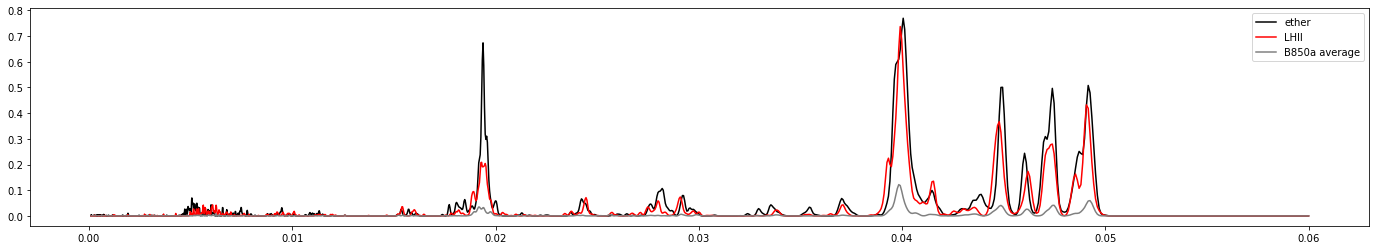

In [13]:
fig, ax = plt.subplots()

start, end = 1e-4, 6e-2
num = 3500

p_range = (start, end, num)

fig.set_size_inches(24, 4)

spectral_density.broadened_spectral_density(ether_dat, 10, ax, 0.0025, p_range=p_range, color=colors['ether'])

for i in [0]: # b850a:
    spectral_density.broadened_spectral_density(LHII["site_e"][:, i], 10, ax, 0.0025, p_range=p_range, color=colors['LHII'])

spectral_density.broadened_spectral_density(ring_avg, 10, ax, 0.0025, p_range=p_range, color=colors['ring'])

ax.legend(['ether', 'LHII', 'B850a average'])
fig.set_size_inches(24, 4)

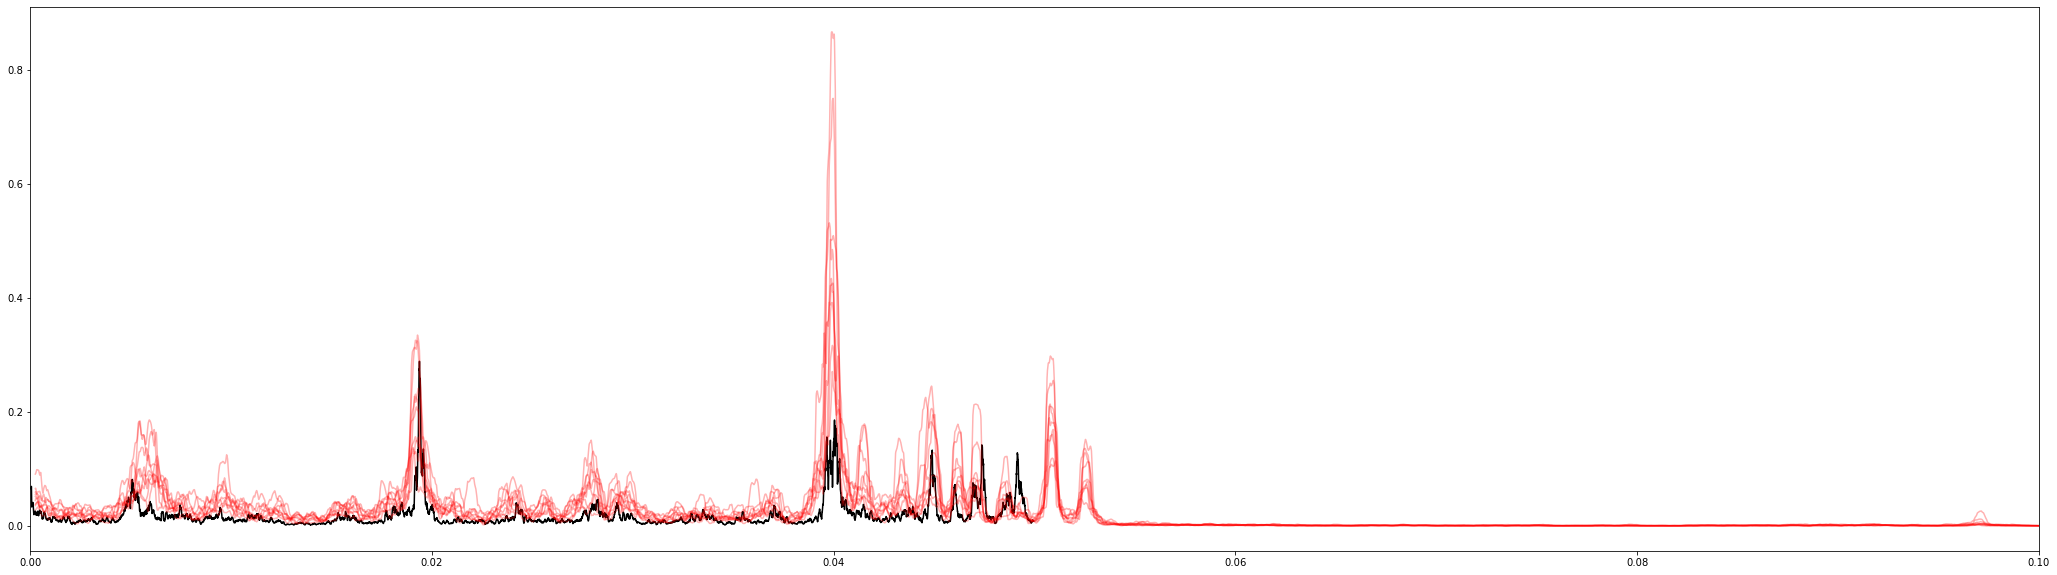

In [60]:
N = 50
N_eth = 100
fig, ax = plt.subplots()

ax.set_xlim(0, 0.10)

#ax.plot(utils.first_half(domain_eth), utils.first_half(np.abs(spectrum_eth)), color=colors['ether'], alpha=0.25)
ax.plot(utils.moving_average(utils.first_half(domain_eth), N_eth), utils.moving_average(utils.first_half(np.abs(spectrum_eth)), N_eth), color=colors['ether'])

#ax.plot(utils.first_half(domain_LHII), utils.first_half(np.abs(spectrum_LHII)), color=colors['LHII'], alpha=0.25)

for i in b850a:
    autocorr_LHII, spectrum_LHII, domain_LHII = spectral_density.spectrum_and_domain(LHII["site_e"][:,i] - np.mean(LHII["site_e"][:,i]), 2)
    ax.plot(utils.moving_average(utils.first_half(domain_LHII), N), utils.moving_average(utils.first_half(np.abs(spectrum_LHII)), N), color=colors['LHII'], alpha=0.3)
    
#for i in b850b:
#    autocorr_LHII, spectrum_LHII, domain_LHII = spectral_density.spectrum_and_domain(LHII["site_e"][:,i] - np.mean(LHII["site_e"][:,i]), 2)
#    ax.plot(utils.moving_average(utils.first_half(domain_LHII), N), utils.moving_average(utils.first_half(np.abs(spectrum_LHII)), N), color='blue', alpha=0.3)
    
#for i in b800:
#    autocorr_LHII, spectrum_LHII, domain_LHII = spectral_density.spectrum_and_domain(LHII["site_e"][:,i] - np.mean(LHII["site_e"][:,i]), 2)
#    ax.plot(utils.moving_average(utils.first_half(domain_LHII), N), utils.moving_average(utils.first_half(np.abs(spectrum_LHII)), N), color='green', alpha=0.3)

#ax.plot(utils.first_half(domain_ring), utils.first_half(np.abs(spectrum_ring)), color=colors['ring'], alpha=0.25)
#ax.plot(utils.moving_average(utils.first_half(domain_ring), N), utils.moving_average(utils.first_half(np.abs(spectrum_ring)), N), color=colors['ring'])

fig.set_size_inches(36, 10)

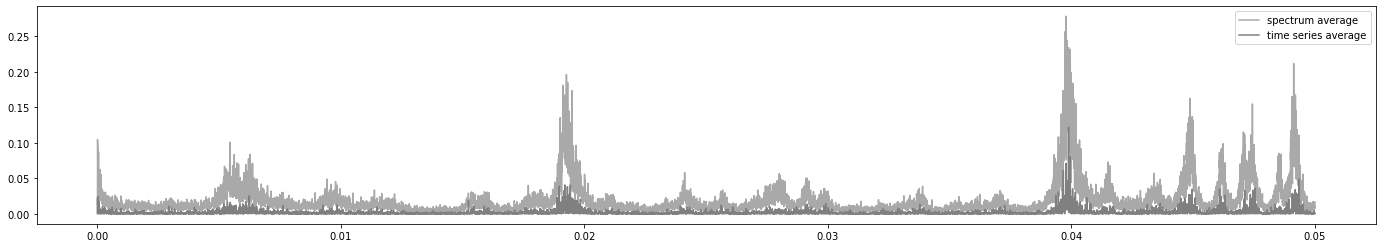

In [13]:
spectrum_res = np.zeros(49996)

domain = None

for i in b850a:
    autocorr_i, spectrum_i, domain_i = spectral_density.spectrum_and_domain(LHII["site_e"][:,i] - np.mean(LHII["site_e"][:,i]), 10)
    
    spectrum_res += utils.first_half(np.abs(spectrum_i))
    domain = utils.first_half(domain_i)
    
spectrum_res /= len(b850a)

fig, ax = plt.subplots()
ax.plot(domain, spectrum_res, color='darkgray')
ax.plot(utils.first_half(domain_ring), utils.first_half(np.abs(spectrum_ring)), color='gray')

ax.legend(['spectrum average', 'time series average'])
fig.set_size_inches(24, 4)